# Spectral Method Theory

We've tried to present this material so far in a manner which is as easy to understand as possible with a distant understanding of probability/statistics and a working knowledge of machine learning. Unfortunately, there is really no way around it now, so this section is about to get hairy mathematically. To understand this section properly, you should have an extremely firm understanding of linear algebra, and more than likely, should have a working knowledge of matrix analysis and multivariate probability theory. While we've already seen some concentration inequalities in the last section (Chebyshev's inequality) you should have a working knowledge of how this term can be extended to random vectors and matrices before proceeding. Before taking on this section, we would recommend checking out the excellent primer by Roman Vershynin, [High Dimensional Probability](https://www.math.uci.edu/~rvershyn/papers/HDP-book/HDP-book.html), which should get you a good foundation to understand many of the results we will take a look at here. We aren't going to prove many of these results; if you want more details, please check out the [excellent paper on Random Dot Product Graphs](https://jmlr.org/papers/volume18/17-448/17-448.pdf) by Avanti Athreya and her research team from 2017.

Buckle up!

## Disclaimer about classical statistical asymptotic theory

While in classic statistics there is a large literature that derives the large sample properties of an estimator, these concepts are more challenging in network analysis for multiple reasons. To start with, the very basic concept of sample size is not particularly clear. We often associate sample size with the number of observations, which are usually assumed to be independent from each other (for example, think of the number of poll participants to estimate polling preferences). In a network, having independent observations is no longer possible in the same way since all we observe are edges, and they are related to some type of interaction between two vertices. We therefore often assume that the sampled units are the vertices. However, everytime a new vertex is added, a new set of interactions with all the existing vertices is added to the model, which often results in the need of including more parameters, leading to the second important challenge in studying networks. A body of new literature has addressed some of these challenges for the models and estimators introduced in the previous sections, and we review some of these results here.

## Adjacency spectral embedding

In the following sections, we summarize some of the main results in the literature about spectral embeddings. A more in-deep review of this results is presented  in Dr. Athreya's paper. In this section, we review some theoretical properties for the adjacency spectral embedding (ASE), introduced in {numref}`ch6:spectral`. We focus on contextualizing this method using the random dot product graph (RDPG) model from {numref}`ch5:rdpg`. If you haven't, we'd recommend you check out the appendix section as well from {numref}`app:ch12:rdpg`.

The results we present in this section aim to understand the general question of how effective the spectral embedding methods are in estimating the latent positions of a random network generated from the RDPG model. Ideally, we would like these embeddings to be as close as possible to the true latent positions. The results we present on this section show that these estimates are indeed close if the network is sufficiently large. Moreover, the limiting distribution of these estimates can be characterized explicitly in a similar fashion as the classic central limit theorems in statistics.

In the rest of the section, we consider a random adjacency matrix $\mathbf{A}$ with $n$ vertices sampled from the RDPG model with latent positions $\mathbf{X}\in\mathbb{R}^{n\times d}$. We write this matrix as $\mathbf{X}= [\mathbf{x}_1, \ldots, \mathbf{x}_n]^\top$, so that the row $i$ contains a vector $\mathbf{x}_i\in\mathbb{R}^d$ which represents the latent position of vertex $i$, and as such, the upper-tiangular entries of $\mathbf{A}$ are independent with probability
$$\mathbb{P}(\mathbf{A}_{ij}=1)= \vec{\mathbf x}_i^\top\vec{\mathbf x}_j, \quad\quad\text{for all i<j}.$$
The rows of $\mathbf X$, are assumed to be independent and identically distributed with $\vec{\mathbf x}_1, \ldots, \vec{\mathbf x}_n\overset{\text{i.i.d.}}{\sim} F$, where $F$ is a distribution with support in  $\mathbb R^d$.  We use $\widehat{\mathbf X}=ASE(\mathbf A)\in\mathbb R^{n\times d}$ to denote the $d$-dimensional adjacency spectral embedding of $\mathbf A$.

### Statistical error of the adjacency spectral embedding

#### Consistency
As we have observed before (for instance, see {numref}`ch5:rdpg`), the latent position matrix $\mathbf{X}$ of the network $\mathbf{A}$ encodes important vertex properties, such as community assignments, or more generally, a latent geometry that characterizes the probabilites of the edges. As such, it is fundamental to understand how close the true and the estimated latent positions (obtained from the ASE) are from each other. The answer depends on several factors that we review here.

When we want to compare the estimates and the true latent positions, we face a unavoidable problem: the parameters of a random dot product graph, namely, the latent positions, are *not identifiable*. In other words, given a matrix $\mathbf{X}$, it is possible to find another matrix $\mathbf{Y}\in\mathbb{R}^{n \times d}$ that produces exactly the same edge probability matrix, that is, $\mathbf{P} = \mathbf{X} \mathbf{X}^\top = \mathbf{Y}\mathbf{Y}^\top$. For instance, changing the signs of the columns of $\mathbf X$ does not change the inner products of their rows, and thus, the matrix $\mathbf{P}$ remains unaffected to these type of transformations. In general,  as long as the columns of $\mathbf{X}$ are linearly independent, all the possible matrices $\mathbf{Y}$ that satisfy the previous relation are equal up to an orthogonal transformation. In other words, there exists an orthogonal matrix $\mathbf{W}$ of size $d\times d$ such that $\mathbf{Y} =\mathbf{X}\mathbf{W}$. Here we need to make a technical assumption  to guarantee that this condition (that the columns of $\mathbf{X}$ are linearly independent) holds with high probability. In particular, we will  assume that the second moment matrix $\mathbf{\Delta} = \mathbb{E}[\vec{\mathbf x}_1\vec{\mathbf x}_1^\top]\in\mathbb R^{d\times d}$ has non-zero eigenvalues. This condition simplifies the type of non-identifiabilities we may face, since the probability of having correlated columns in $\mathbf{X}$ would be very small if $n$ is sufficiently large.

The first result we review concerns the error of the adjacency spectral embedding (ASE) method; that is, the difference between $\mathbf{X}$ and the estimated latent position matrix $\widehat{\mathbf X}$. This estimator has been shown to consistently estimate the latent positions. In other words, as the sample size (number of nodes) increases, the estimated latent positions approach the true latent positions. The typical distance between these two matrices can be quantified explicitly in terms of the sample size $n$, dimension of the latent positions $d$ and a constant $C$ that only depends on the particular distribution of the latent positions $F$. In particular, with probability tending to one as $n$ goes to infinity, it holds that the largest distance between the true and estimated latent positions satisfies:
\begin{equation}
\max_{i\in[n]}\|\widehat{\vec{\mathbf x}}_i - \mathbf W\vec{\mathbf x}_i\| \leq \frac{Cd^{1/2}\log^2 n}{\sqrt{n}}.
\end{equation}
Here, $\mathbf W\in\mathbb R^{d\times d}$  is an orthogonal matrix (which depends on the specific values of $\widehat{\mathbf X}$ and $\mathbf{X}$) that accounts for the non-identifiability of the latent positions we mentioned before. In other words, this equation shows that the true and estimated latent positions (after a proper orthogonal rotation) are uniformly close to each other, and they get closer as $n$ grows. We refer to them as *uniformly close* because the choice of a constant $C$ holds *for all* $n$ nodes. Note that the error rate also depends on the dimension of the model $d$, since as $d$ gets larger, the dimension of the parameter space increases and the estimation error also increases.

#### Asymptotic normality

A further result on the asymptotic properties of the ASE concerns to the distribution of the estimation error; that is, the difference between the estimated latent position $\widehat{\vec{\mathbf x}}_i$ (for a given node $i$) and the true parameter $\vec{\mathbf x}_i$. Because the estimator is consistent, this difference shrinks with $n$ (after the proper orthogonal rotation), but knowing this fact is not enough if one desires to quantify their difference more carefully. This is important, as some statistical tasks, such as hypothesis testing or confidence interval estimation, require to know distributional properties of the estimation error.

Distributional results on the rows of the adjacency spectral embedding show that the error in estimating the true latent positions converge to a type of multivariate normal normal distribution as the size of the network grows. In particular, it has been shown that the 
difference between $\widehat{\mathbf{X}}$ and $\mathbf{X}$, after a proper orthogonal transformation $\mathbf{W}_n$, converge to a mixture of multivariate normal distributions. Formally, we can write the multivariate cumulative distribution function for any given vector $\vec{\mathbf{z}}\in\mathbb R^{d}$ as
\begin{equation}
\mathbb{P}\left(\sqrt{n}\left(\widehat{\vec{\mathbf x}}_i - \mathbf W_n \vec{\mathbf x}_i\right)\leq \vec{\mathbf{z}} \right) \approx \int_{\mathbb{R}^d}\Phi(\vec{\mathbf{z}}, \mathbf{\Sigma}(\vec{\mathbf{x}}))\  \text dF(\vec{\mathbf{x}}),
\end{equation}
where $\Phi(\cdot, \mathbf{\Sigma}(\vec{\mathbf{x}}))$ is the cumulative distribution function of a $d$-dimensional multivariate normal distribution with mean zero and a covariance matrix $\mathbf{\Sigma}(\vec{\mathbf{x}})\in\mathbb R^{d\times d}$. It is worth noting that the integral on the right hand side operates over all possible values of $\vec{\mathbf{x}}\in\mathbb{R}^d$, and it is integrated with respect to the distribution of the latent positions, which are sample independently from $F$. The covariance matrix $\mathbf{\Sigma}(\vec{\mathbf x})$ depends on a specific value of a latent position $\vec{\mathbf x}\in\mathbb{R}^d$, and is given by:

\begin{equation}
\mathbf{\Sigma}(\vec{\mathbf x}) = \mathbf{\Delta}^{-1}\mathbb{E}[\vec{\mathbf x}_1\vec{\mathbf x}_1^\top(\vec{\mathbf x}^\top\vec{\mathbf x}_1 - (\vec{\mathbf x}^\top\vec{\mathbf x}_1)^2) ]\mathbf{\Delta}^{-1}.
\end{equation}
For certain classes of distributions, it is possible to simplify this expression further to get a more specific form of the asymptotic distribution of $\widehat{\vec{\mathbf x}}_i$. We present an example later on this section.


The two results presented on this section constitute the basic properties of the adjacency spectral embedding under the RDPG model, but existing results are not limited to this particular method and model. Extensions of these results to a broader class of network models have been already developed (included the so-called *generalized random dot product graphs*). Analogous results also exist for other type of embedding methodologies. For instance, the Laplacian spectral embedding ($LSE$, from {numref}`ch6:spectral`) possess analogous properties to the ASE (namely, consistent estimates with known asymptotic distribution), although the particular form of this theorem is a bit more complicated. The study of different network models and embedding methods is still a research area under development, and new results keep coming every day.

### Example: Erdős-Rényi graphs and the adjacency spectral embedding
The ER model (from {numref}`ch5:er` and {numref}`app:ch12:ers`) is the simplest example of a Random Dot Product Graph, in which all edge probabilities are the same. We will use this model to derive concrete expressions for the equations in the theory we have presented. Suppose that $\mathbf A$ is a random network with a $ER_n(p)$ distribution, for some $p\in(0,1)$. We can write the distribution of this network using a unidimensional latent position matrix $\vec{\mathbf x} = (\mathbf x_1, \ldots, \mathbf x_n)^\top$, with all entries equal to $\sqrt{p}$, since this will give
$$Pr(\mathbf{A}_{ij}) = \mathbf{x}_i\mathbf{x}_j = p.$$
Thus, the ER graph $ER_n(p)$ can be thought as a RDPG with distribution of the latent positions $F=\delta_{\sqrt{p}}$, where $\delta_{\sqrt{p}}$ is the Dirac delta distribution that only assigns positive probability to the mass point $\sqrt{p}$. It is worth noting that from this representation we can already notice a non-identifiability in the model, as both $\vec{\mathbf x}$ and $-\vec{\mathbf x}$ will result in the same edge probabilities. For practical purposes, it does not matter which of these two representations we recover.

The adjacency spectral embedding of the ER graph $\mathbf{A}$ is the unidimensional vector $\widehat{\vec{\mathbf x}} = \widehat{\lambda}\widehat{\vec{\mathbf v}}$, where  $\widehat{\vec{\mathbf v}}\in\mathbb{R}^n$ and $\widehat{\lambda}\in\mathbb{R}$ are the leading eigenvector and eigenvalue of $\mathbf{A}$. The adjacency spectral embedding of $\mathbf{A}$ is simply given by $\widehat{\vec{\mathbf x}} = ASE(\mathbf{A}) = \sqrt{\widehat{\lambda}}\widehat{\vec{\mathbf v}}$. According to the theory presented before, we have that the error in estimating $\vec{\mathbf{x}}$ from $\widehat{\vec{\mathbf{x}}}$ should decrease as the size of the network increases. In particular, we have that:
\begin{align*}
\max_{i\in[n]}|\widehat{\mathbf x}_i - \sqrt{p}w_n| \leq \frac{C\log^2 n}{\sqrt{n}}.
\end{align*}
Here, $w_n$ plays the role of  a one-dimensional orthogonal matrix that accounts for the non-identifiability of the model; in other words, $w_n$ is either equal to $1$ or $-1$, which comes from the sign ambiguity of the eigenvectors. Let's see how this works out in practice. We'll begin by simulating $50$ networks as-specified above, for networks with increasing numbers of nodes from around $30$ to around $3000$:

In [146]:
from graspologic.simulations import er_np
import numpy as np

# set the probability ahead of time
p = 0.5
ns = np.round(10**np.linspace(1.5, 3.5, 5)).astype(int)

# run the simulations for each number of nodes
As = [[er_np(n, p) for i in range(0, 50)] for n in ns]

Next, we spectrally embed each network into a single dimension, and then check to make sure the signs of the estimated latent positions and the true latent positions align due to the orthogonality issue:

In [147]:
from graspologic.embed import AdjacencySpectralEmbed as ASE
# instantiate an ASE instance with 1 embedding dimension
ase = ASE(n_components=1)

# check for sign alignment, and flip the signs if Xhat and X disagree
def orthogonal_align(Xhat, p=0.5):
    if ((Xhat*np.sqrt(p)).sum() < 0):
        Xhat = -Xhat
    return Xhat

# compute the estimated latent positions and realign in one step
Xhats_aligned = [[orthogonal_align(ase.fit_transform(A)) for A in An] for An in As]

Finally, we compute the maximum difference between the estimated latent positions (after alignment) and $\sqrt{p}$ for each network. We divide by $\log^2(n)$ and multiply by $\sqrt{n}$, and then plot the result as the average (solid line) and $95\%$ probability interval (shaded ribbon) for a given value of $n$. If we were to fix a constant value $C$ and as $n$ grows the values are consistently under this constant with increasing probability, we have demonstrated the desired result empirically:

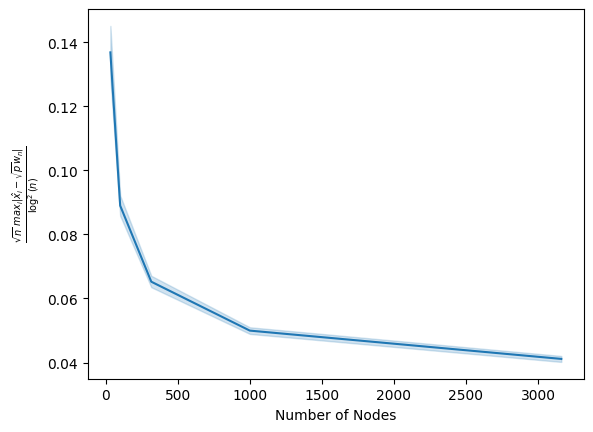

In [148]:
import pandas as pd
import seaborn as sns

network_numbers = np.vstack([np.vstack([np.full((n, 1), i) for i in range(0, 50)]) for n in ns]).flatten()
node_indices = np.vstack([np.vstack([np.arange(0, n).reshape((n, 1)) for i in range(0, 50)]) for n in ns]).flatten()
node_counts = np.vstack([np.vstack([np.full((n, 1), n) for i in range(0, 50)]) for n in ns]).flatten()
Xhats_aligned_flat = np.vstack([np.vstack([Xhat for Xhat in Xhats_n]) for Xhats_n in Xhats_aligned]).flatten()

df = pd.DataFrame({"Xhat": Xhats_aligned_flat, "i" : node_indices, "n" : node_counts,
                   "j" : network_numbers, "X" : np.sqrt(p)})

df["abs_diff"] = np.abs(df["Xhat"] - df["X"])
max_pernet = df.groupby(
    ["n", "j"]
).agg({
    "abs_diff": "max"
}).reset_index()

max_pernet["norm_factor"] = np.log(max_pernet["n"])**2/np.sqrt(max_pernet["n"])
max_pernet["norm_diff"] = max_pernet["abs_diff"]/max_pernet["norm_factor"]

ax = sns.lineplot(data=max_pernet, x="n", y="norm_diff")
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("$ \\frac{\\sqrt{n}\,\, max_i |\hat x_i - \sqrt{p} w_n|}{\log^2(n)}$");

As we can see, this value drops off pretty rapidly as we increase the number of nodes. Therefore, we could choose basically *any* constant (such as, for instance, $0.10$), and the above plot demonstrates that empirically, as the number of nodes approaches infinity, the probability that the $y$-axis values are less than our choice of a constant tends towards $1$, as desired. Pretty neat, right?

Similarly, we can also obtain an expression for the asymptotic distribution of the difference between the true and estimated positions. First, notice that since $F$ has only one point mass at $\sqrt{p}$, we can evaluate integrals and expections with respect to this distribution, resulting in
$$\int_{\mathbb{R}^d}\Phi(\mathbf{z}, \mathbf{\Sigma}(\mathbf{x}))\  dF(\mathbf{x}) = \Phi(\mathbf{z}, \mathbf{\Sigma}(\sqrt{p}).$$
The exact form of the covariance term $\mathbf{\Sigma}(\mathbf{x})$ can be obtained from the second moment matrix $\mathbf{\Delta} = \mathbb{E}[\mathbf{x}_1^2] = p$, and it is given by:
$$\mathbf{\Sigma}(\mathbf{x}) = \frac{1}{p^2}\mathbb{E}[p(\mathbf{x}\sqrt{p} - (\mathbf{x}\sqrt{p})^2)].$$
Combining these results, we get that the limiting distribution of the difference between $\widehat{\mathbf{x}}$ and $\mathbf{x}$ satisfies
$$\sqrt{n}\left(\widehat{\mathbf{x}}_i - \sqrt{p}\right)\ \rightarrow\  N(0, 1-p)\quad\quad\text{for each node }i=1, \ldots, n.$$
The asymptotic normality result is illustrated in the simulation setting below. In particular, observe that, as the size of the network $n$ increases, the distribution of the entries of $\mathbf{x}$ resembles the normal distribution. We'll repeat this for one network from each number of nodes to see this result, by showing a histogram of the limiting factors $\sqrt{n}(\hat x_i - \sqrt{p})$ in our realized networks for all $n$ nodes. We will plot it against the pdf for an appropriate normal distribution with mean $0$ and standard deviation $1 - p$ in red:

In [153]:
df_reduced = df.loc[df["j"] == 0]  # check what happens for the first network from each set
# isolate the factor sqrt(n)*(xhat_i - sqrt(p)) that we want the limiting distribution of
df_reduced["limiting_factor"] = np.sqrt(df_reduced["n"]) * (df_reduced["Xhat"] - df_reduced["X"])

/var/folders/r_/8hcfnmrs7z5160l03b04bjpw0000gn/T/ipykernel_89509/881713792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["limiting_factor"] = np.sqrt(df_reduced["n"]) * (df_reduced["Xhat"] - df_reduced["X"])


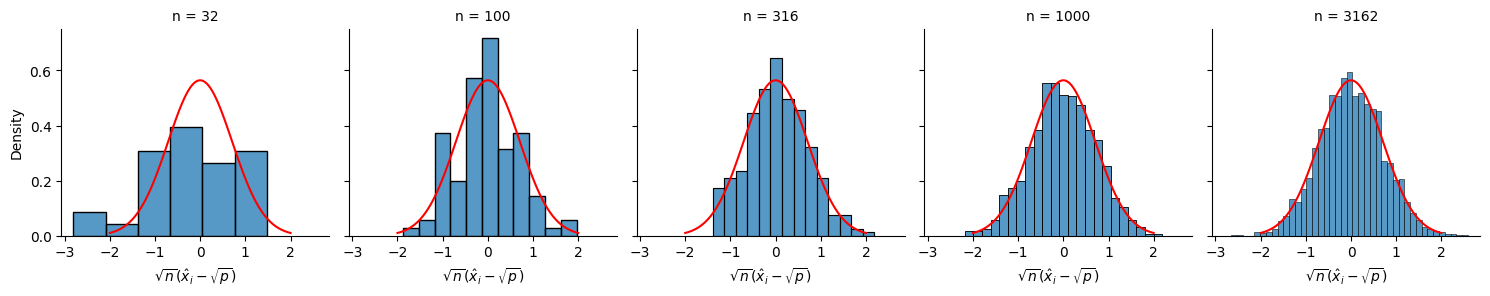

In [155]:
from scipy.stats import norm

g = sns.FacetGrid(df_reduced, col="n")
g.map(sns.histplot, "limiting_factor", stat="density")
truth = pd.DataFrame({"x" :  np.linspace(-2, 2, 100)})
truth["y"] = norm.pdf(truth["x"], scale=np.sqrt(1-p))

axes = g.fig.axes
for ax in axes:
    sns.lineplot(data=truth, x="x", y="y", ax=ax, color="red");
g.set_axis_labels("$\\sqrt{n}(\\hat x_i - \sqrt{p})$");

As $n$ grows, the limiting distribution of $\sqrt n(\hat x_i - \sqrt{p})$ clearly approaches the desired normal distribution.

### Applications: two-graph hypothesis testing

The results previously discussed demonstrate that the true and estimated latent positions are close to each other, and in fact, their distance gets smaller as $n$ increases. As such, the ASE provides an accurate estimator of the latent positions. This result justifies the use of $\mathbf {\hat X}$ in place of $\mathbf X$ for subsequent inference tasks, such as community detection, vertex nomination, or classification (see Sections {numref}`ch7:comm_detect`, {numref}`ch7:vn`, or {numref}`ch8:gm` for a more thorough discussion on these topics). The theoretical results for the ASE have multiple implications. One of those  is that the estimated latent positions carry almost the same information as the true latent positions, and we can even quantify how different they are. This is particularly useful for performing statistical inference tasks about vertex properties. Here we consider one of these tasks: two-graph hypothesis testing.

Comparing the distribution of two populations is a frequent problem in statistics and across multiple domains. In classical statistics, a typical strategy to perform this task is to compare the mean of two populations by using an appropriate test statistic. Theoretical results on the distribution of this statistic (either exact or asymptotic) are then used to derive a measure of uncertainty for this problem (such as p-values or confidence intervals). Similarly, when comparing two observed graphs, we may wonder whether they were generated by the same mechanism. The results discussed before have been used to develop valid statistical tests for two-network hypothesis testing questions. 

A network hypothesis test for the equivalence between the latent positions of the vertices of a pair of networks with aligned vertices can be constructed by using the estimates of the latent positions. Formally, let $\mathbf X, \mathbf Y\in\mathbb R^{n\times d}$ be the latent position matrices, and define
$\mathbf A\sim RDPG(\mathbf X)$, $\mathbf B\sim RDPG(Y)$ as independent random adjacency matrices. We can test whether the two networks have the same distribution by comparing their latent positions via a hypothesis test of the form
\begin{align*}
\mathcal{H}_0:\mathbf X =_{\mathbf W} \mathbf Y\quad\quad\quad \text{ vs.}\quad\quad\quad \mathcal{H}_a:\mathbf X\neq_{\mathbf W} \mathbf Y,
\end{align*}
where $\mathbf X =_{\mathbf W}\mathbf Y$ denotes that $\mathbf X$ and $\mathbf Y$ are equivalent up to an orthogonal transformation $\mathbf W\in\mathcal{O}_d$, and $\mathcal{O}_d$ is the set of $d\times d$ orthogonal matrices. Since we do not have access to the true latent positions, we can use the estimates $\widehat{\mathbf X}$ and $\widehat{\mathbf Y}$ to construct a test statsistic. This test statistic is defined as
\begin{align*}
T : = \frac{\min_{\mathbf W\in\mathcal{O}_d} \|\widehat{\mathbf X}\mathbf W - \widehat{\mathbf Y}\|_F}{\sqrt{d\gamma^{-1}(\mathbf A)} + \sqrt{d\gamma^{-1}(\mathbf B)}}.
\end{align*}
Here, $\|\widehat{\mathbf X}\mathbf W - \widehat{\mathbf Y}\|_F$ is the Frobenius distance between the estimated latent positions (after adjusting for the orthogonal non-identifiability).
This distance compares how similar the two latent positions are, and thus, it is natural to think that larger values of this distance will give more evidence agains the null hypothesis. In addition to this, the test statistic incorporates a normalizing constant of the form $\sqrt{d\gamma^{-1}(\mathbf A)} + \sqrt{d\gamma^{-1}(\mathbf B)}$. Here $\sigma_1(\mathbf A) \geq \ldots\geq \sigma_n(\mathbf A)\geq 0$ denote the singular values of $\mathbf A$ (similarly for $\mathbf B$),  $\delta(\mathbf A) = \max_{i\in[n]}\sum_{j=1}^n\mathbf A_{ij}$ denotes the largest observed degree of the graph, and
$$\gamma(\mathbf A):=\frac{\sigma_d(\mathbf A) - \sigma_{d+1}(\mathbf A)}{\delta(\mathbf A)}$$
is a constant that standardizes the test statistic. It can be shown that, under appropriate regularity conditions that this test statistic will go to zero as $n$ goes to infinity under the null hypothesis, and will diverge with $n$ for some specific alternatives. Thus, $T$ provides a way to construct a consistent test for the hypothesis testing problem described above.



## Theory for multiple network models
Models for multiple network data often assume that there is a known one-to-one correspondence between the vertices of the graphs. If this correspondence is unknown, an estimate can be obtained via graph matching. Once the vertices are correctly matched, models for multiple networks exploit the shared structure across the graphs to obtain accurate estimates. In this section we review the theoretical challenges on these circumstances. 



### Graph Matching for Correlated Networks

Given a pair of network adjacency matrices $\mathbf A$ and $\mathbf B$ with $n$ vertices each (but possibly permuted), the graph matching problem seeks to *align* the graphs by identifying the correct correspondence between their vertices. This can be done by identifying a permutation matrix $\mathbf P$ of size $n\times n$ that makes the graphs $\mathbf A$ and $\mathbf P^\top \mathbf B \mathbf P$ similar.
There are many methods to perform grapph matching, and here we focus on the following optimization problem (which is reviewed more carefully in Section ????):
\begin{equation*}
\widehat{\mathbf P} =\text{argmin}_P \|\mathbf A - \mathbf P^\top \mathbf B \mathbf P\|_F^2.
\end{equation*}
The accuracy in matching the vertices across the graphs depends on this estimated permutation matrix $\widehat{\mathbf P}$. Denote by $\mathbf P^\ast$ to the true permutation matrix that aligns the two graphs, which is the object we would like to estimate. In principle, if there is a unique solution that gives $\mathbf A = (\mathbf P^\ast)^\top \mathbf B \mathbf P^\ast$, the two networks are isomorphic (i.e., equal up to some  permutation of the vertices), and matching the vertices across the networks is possible. However, in the presence of  noise (which is typically the case), the graphs are not isomorphic, and hence the solution to the optimization problem above becomes more relevant.

A body of literature has studied the feasibility of finding the correct matching under different random network models, including correlated Erdös-Rényi and Bernoulli networks. In this section we review some of the results for the correlated Erdös-Rényi (ER) model described in [Section 5.5](#link?).

The correlated ER model has only two parameters, namely, the edge density and the correlation across a pair of graphs. This two parameters are crucial in understanding the feasibility of solving the graph matching problem. On the one hand, the edge density controls the amount of information that is present on each graph. If the density is very close to zero, the information available to match the graphs is low, which makes the problem harder. On the other hand, the correlation paraameter controls the level of similarity across the graphs. A large correlation value facilitates matching the graphs, as the edges exhibit similar or exactly the same patterns in both graphs.  Formally, given parameters $q \in(0, 1)$ and $\rho\in[0,1]$, the $n\times n$ adjacency matrices $\mathbf A$ and $\mathbf B$ are distributed as correlated ER random graphs if each graph is marginally distributed as an ER of the form $\mathbf A\sim ER_n(q_n)$, $\mathbf B\sim ER_n(q_n)$, but the edge pairs satisfy $\text{Corr}(\mathbf A_{ij},\mathbf B_{ij})=\rho$. In particular, if $\rho=0$, then the graphs are just independent realizations of an ER network but there is no common structure between them. On the contrary, if $\rho=1$, then the graphs are isomorphic.

Having defined the model, the next question is whether the solution of the graph matching optimization problem (defined in [Section 9.3](#link?)) recover the correct solution. In the correlated ER model, it can be shown that this is possible when the correlation between the networks and the edge probability that are not to small. Formally, the conditions require that $\rho\geq c_1\sqrt{\frac{\log n}{n}}$ and $q\geq c_2 \frac{\log n }{n}$  (here, $c_1$ and $c_2$ are just some positive fixed constants). This conditions guarantee that the correlation across the graphs is large enough, so there is enough shared information, while the edge density needs to be sufficiently away from zero and one, to ensure that there are enough edges within each graph. Under these conditions, it can be shown that, with high probability, the correct solution of the graph matching problem is obtained if $n$ is sufficiently large.


### Joint spectral embeddings





### Omnibus Embedding (omni)

The omnibus embedding described in [Section 6.7] jointly estimates the latent positions under the joint random dot product network ($ JRDPG$) model, where $(\mathbf A^{(1)}, \ldots, \mathbf A^{(m)})\sim JRDPG(\mathbf X_n)$, and the rows of $\mathbf X_n\in\mathbb R^{n\times d}$ are an i.i.d. sample from some distribution $F$. Let $\widehat{\mathbf{O}}\in\mathbb R^{mn\times mn}$ be the omnibus embedding of $\mathbf A^{(1)}, \ldots, \mathbf A^{(m)}$ and $\widehat{\mathbf Z} = ASE(\mathbf{O})\in\mathbb R^{mn\times d}$.
Under this setting, it can be shown that the rows of $\widehat{\mathbf Z}_n$ are a consistent estimator of the latent positions of each individual network  as $n\rightarrow\infty$, and that:
\begin{equation}
\max_{i\in[n],j\in[m]}\|(\widehat{\mathbf Z}_n)_{(j-1)n + i} - \mathbf W_n(\mathbf X_n)_{i}\| \leq \frac{C\sqrt{m}\log(mn)}{\sqrt{n}}. \label{eq:OMNI-consistency}    
\end{equation}
Furthermore, a central limit theorem for the rows of the omnibus embedding  asserts that:
\begin{equation}
\lim_{n\rightarrow\infty} \mathbb{P}\left\{\sqrt{n}\left(\mathbf W_n(\widehat{\mathbf Z}_n)_{(j-1)n + i} - (\mathbf X_n)_i\right)\leq \mathbf{z}\right\}  = \int_{\mathcal{X}}\Phi(\mathbf{z}, \widehat{\mathbf{\Sigma}}(\mathbf{x}))\  dF(\mathbf{x}),\label{eq:thm-OMNI-CLT}
\end{equation}
for some covariance matrix $\widehat{\Sigma}(\mathbf{x})$. 

### Multiple adjacency spectral embedding (MASE)

The $COSIE$ model described in [Section 5.5](#link?) gives a joint model that characterizes the distribution of multiple networks with expected probability matrices that share the same common invariant subspace. The $MASE$ algorithm (see [Section 5.5](#link?)) is a consistent estimator for this common invariant subspace, and results in asymptotically normally estimators for the individual symmetric matrices. Specifically, let $\mathbf V_n\in\mathbb R^{n\times d}$ be
a sequence of orthonormal matrices and $\mathbf R^{(1)}_n, \ldots, \mathbf R^{(m)}_n\in\mathbb R^{d\times d}$ a sequence of score matrices such that $\mathbf{P}^{(l)}_n=\mathbf V_n\mathbf R^{(l)}_n\mathbf V_n^\top\in[0,1]^{n\times n} $, $(\mathbf A_n^{(1)}, \ldots, \mathbf A_n^{(m)})\sim COSIE(\mathbf V_n;, \mathbf R^{(1)}_n, \ldots, \mathbf R^{(m)}_n)$, and $\widehat{\mathbf V}, \widehat{\mathbf R}^{(1)}_n, \ldots, \widehat{\mathbf R}^{(1)}_n$ be the estimators obtained by $MASE$. Under appropriate regularity conditions, the estimate for $\mathbf V$ is consistent as $n,m\rightarrow\infty$, and there exists some constant $C>0$ such that:
\begin{align*}
\mathbb{E}\left[\min_{\mathbf W\in\mathcal{O}_d}\|\widehat{\mathbf V}-\mathbf V\mathbf W\|_F\right] \leq C\left(\sqrt{\frac{1}{mn}} + {\frac{1}{n}}\right). \label{eq:theorem-bound}
\end{align*}
In addition, the entries of $\widehat{\mathbf{R}}^{(l)}_n$, $l\in[m]$ are asymptotically normally distributed. Namely, there exists a sequence of orthogonal matrices $\mathbf W$ such that:
$$\frac{1}{\sigma_{l,j,k}}\left(\widehat{\mathbf R}^{(l)}_n - \mathbf W^\top\mathbf R^{(l)}_n\mathbf W + \mathbf H_m^{(l)}\right)_{jk} \overset{d}{\rightarrow} \mathcal{N}(0, 1), $$
as $n\rightarrow\infty$, where:
$\mathbb{E}[\|\mathbf H_m^{(l)}\|]=O\left(\frac{d}{\sqrt{m}}\right)$ and $\sigma^2_{l,j,k} = O(1)$. 
